In [ ]:
# ML Zoomcamp Module 4 Homework - Tristan Kilper

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
# Data Preparation

In [87]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv")

In [88]:
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [89]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [90]:
df[['lead_source','industry','employment_status','location']] = df[['lead_source','industry','employment_status','location']].fillna('NA')
df[['annual_income']] = df[['annual_income']].fillna(0.0)

In [91]:
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NA,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NA,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [92]:
from sklearn.model_selection import train_test_split

In [93]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

del df_train['converted']
del df_val['converted']
del df_test['converted']

In [94]:
len(df_train), len(df_val), len(df_test)

(876, 293, 293)

In [95]:
# Q1

In [96]:
from sklearn.metrics import roc_curve, roc_auc_score
nums = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']

In [97]:
aucs = []
for n in nums:
    auc = roc_auc_score(y_train, df_train[n].to_numpy())
    if auc < .5:
        auc = roc_auc_score(y_train, -df_train[n].to_numpy())
    aucs.append(auc)
aucs

[0.7635680590007088, 0.5519578313253012, 0.738270176293409, 0.6144993577250176]

In [98]:
# Q2

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

In [113]:
dv = DictVectorizer()
model = LogisticRegression(C=1.0, max_iter=1000)

In [114]:
train_dicts = df_train.to_dict(orient='records')

X_train = dv.fit_transform(train_dicts)

model.fit(X_train, y_train)

c:\Users\yasmi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [115]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.fit_transform(val_dicts)

y_pred = model.predict_proba(X_val)[:, 1]

#converted_decision = (y_pred >= 0.5)
auc = roc_auc_score(y_val, y_pred)
round(auc, 2)

0.92

In [116]:
# Q3

In [117]:
thresholds = np.linspace(0, 1.0, 101)
vals = []
for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    pred_positive = (y_pred >= t)
    pred_negative = (y_pred < t)

    tp = (pred_positive & actual_positive).sum()

    fp = (pred_positive & actual_negative).sum()
    fn = (pred_negative & actual_positive).sum()

    precision = tp / (tp + fp)
    recall = tp / (fn + tp)

    print((t, precision, recall))
    vals.append((t, precision, recall))

(np.float64(0.0), np.float64(0.5836177474402731), np.float64(1.0))
(np.float64(0.01), np.float64(0.5958188153310104), np.float64(1.0))
(np.float64(0.02), np.float64(0.6063829787234043), np.float64(1.0))
(np.float64(0.03), np.float64(0.6115107913669064), np.float64(0.9941520467836257))
(np.float64(0.04), np.float64(0.6204379562043796), np.float64(0.9941520467836257))
(np.float64(0.05), np.float64(0.6282527881040892), np.float64(0.9883040935672515))
(np.float64(0.06), np.float64(0.6305970149253731), np.float64(0.9883040935672515))
(np.float64(0.07), np.float64(0.6377358490566037), np.float64(0.9883040935672515))
(np.float64(0.08), np.float64(0.6401515151515151), np.float64(0.9883040935672515))
(np.float64(0.09), np.float64(0.6450381679389313), np.float64(0.9883040935672515))
(np.float64(0.1), np.float64(0.6436781609195402), np.float64(0.9824561403508771))
(np.float64(0.11), np.float64(0.6486486486486487), np.float64(0.9824561403508771))
(np.float64(0.12), np.float64(0.65625), np.float64(

C:\Users\yasmi\AppData\Local\Temp\ipykernel_23056\1713088082.py:15: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)


In [118]:
pd.options.display.min_rows = 20
vals = pd.DataFrame(vals, columns=['threshold','p','r'])
vals

,threshold,p,r
0,0.00,0.583618,1.000000
1,0.01,0.595819,1.000000
2,0.02,0.606383,1.000000
3,0.03,0.611511,0.994152
4,0.04,0.620438,0.994152
5,0.05,0.628253,0.988304
6,0.06,0.630597,0.988304
7,0.07,0.637736,0.988304
8,0.08,0.640152,0.988304
9,0.09,0.645038,0.988304


C:\Users\yasmi\AppData\Local\Temp\ipykernel_23056\1932096550.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


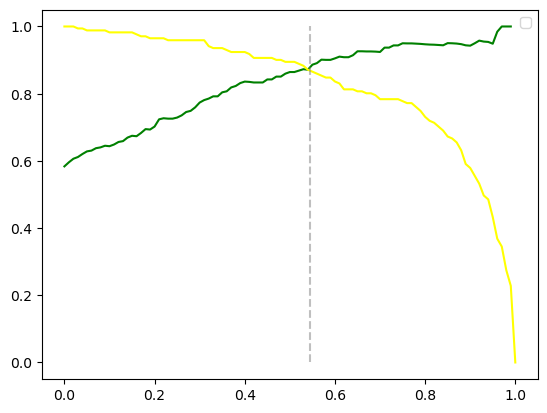

In [121]:
plt.plot(vals.threshold.values, vals.p.values, color='green')
plt.plot(vals.threshold.values, vals.r.values, color='yellow')

plt.vlines(0.545, 0, 1, color='grey', linestyle='--', alpha=0.5)

plt.legend()

In [122]:
# Q4

In [123]:
vals['f1'] = 2 * (vals.p * vals.r) / (vals.p + vals.r)

In [126]:
vals.loc[vals['f1'] == max(vals['f1'])]

,threshold,p,r,f1
50,0.50,0.864407,0.894737,0.87931
51,0.51,0.864407,0.894737,0.87931


C:\Users\yasmi\AppData\Local\Temp\ipykernel_23056\4192658191.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


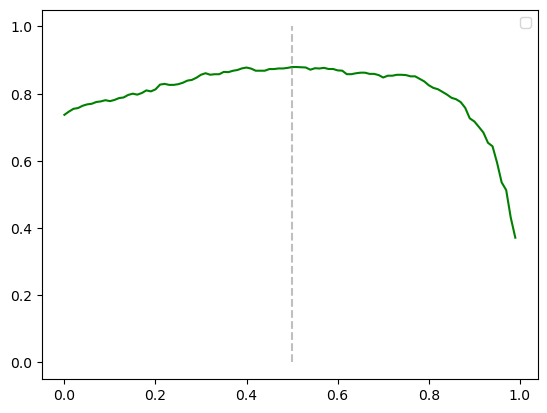

In [127]:
plt.plot(vals.threshold.values, vals.f1.values, color='green')

plt.vlines(0.5, 0, 1, color='grey', linestyle='--', alpha=0.5)

plt.legend()

In [128]:
# Q5

In [147]:
def train(df_train, y_train, c):
    dicts = df_train.to_dict(orient='records')

    dv = DictVectorizer()
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

def predict(df_val, dv, model):
    dicts = df_val.to_dict(orient='records')

    X_val = dv.transform(dicts)

    y_pred = model.predict_proba(X_val)[:, 1]
    return y_pred

In [142]:
from sklearn.model_selection import KFold

In [143]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
scores = []
for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.converted.values
    y_val = df_val.converted.values

    del df_train['converted']
    del df_val['converted']

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)
    
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

In [144]:
scores

[0.8060745924216483,
 0.8713738368910783,
 0.7754320118852139,
 0.8018368617683685,
 0.8558272713202291]

In [145]:
print('%3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.822109 +- 0.036


In [146]:
# Q6

In [148]:
results = []
for C in [0.000001, 0.001, 1]:    
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)
    scores = []
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.converted.values
        y_val = df_val.converted.values

        del df_train['converted']
        del df_val['converted']

        dv, model = train(df_train, y_train, C)
        y_pred = predict(df_val, dv, model)
        
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    results.append((np.mean(scores), np.std(scores)))

In [149]:
results

[(np.float64(0.560207852870275), np.float64(0.023798316620649906)),
 (np.float64(0.8668780317675395), np.float64(0.028746230508215103)),
 (np.float64(0.8221089148573075), np.float64(0.03580711942905165))]